<a href="https://colab.research.google.com/github/ucfilho/raianars_june_2020/blob/master/ANN_PCA_jun_20_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/Raianars_paper_One


In [ ]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=10 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=200 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão
############################### Função

dim=10
#fchoice='Rastrigin' #fchoice='Michalewicz'
fchoice='Schwefel'

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
Fun=Function.Rastrigin
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

In [ ]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/Raianars_paper_One/ANN_read_matrix


In [ ]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
Num=5000
Parallel_Coord=np.zeros((Num,6)) #
Max_DIr=X_max_F[0];Max_Fr=X_max_F[1]
Min_DIr=X_min_F[0];Min_Fr=X_min_F[1];Min_Fr=0
Max_F=X_max_F[2];Max_CR=X_max_F[3]
Min_F=X_min_F[2];Min_CR=X_min_F[3]

In [ ]:

for i in range(Num):
  # random.seed(np.log(i+1))
  DIr=  Min_DIr+(Max_DIr-Min_DIr)*np.random.random();
  # random.seed(2*np.log(i+1))
  Frac=Min_Fr+(Max_Fr-Min_Fr)*np.random.random();
  # random.seed(3*np.log(i+1))
  Fo=Min_F+(Max_F-Min_F)*np.random.random();
  # random.seed(4*np.log(i+1))
  CRo=Min_CR+(Max_CR-Min_CR)*np.random.random();
  x_train=np.array([DIr,Frac,Fo,CRo])
  x_train=pd.DataFrame(x_train).T
  x_train=Go2Ann.Normatiza(x_train,X_max_F,X_min_F)
  y_calc_F=Go2Ann.ANN_ycal(syn0_F,syn1_F,x_train)
  y_calc_CR=Go2Ann.ANN_ycal(syn0_CR,syn1_CR,x_train)
  y_cod_F=Go2Ann.Classifica(y_calc_F)
  y_cod_CR=Go2Ann.Classifica(y_calc_CR)
  Parallel_Coord[i,0]=DIr;Parallel_Coord[i,1]=Frac;
  Parallel_Coord[i,2]=Fo;Parallel_Coord[i,3]=CRo;
  Parallel_Coord[i,4]=y_cod_F[0];Parallel_Coord[i,5]=y_cod_CR[0];
  
Parallel_Coord=pd.DataFrame(Parallel_Coord,columns =fields)



In [ ]:
print(Parallel_Coord)

           DIr  FRAC Its        Fo       CRo    F   CR
0     0.275176  0.178708  0.854895  0.484575 -1.0 -1.0
1     0.373192  0.920961  0.987497  0.849394 -1.0  1.0
2     1.352780  0.578868  0.743613  0.568535 -1.0  1.0
3     1.106131  0.553456  0.403866  0.329969  1.0 -1.0
4     1.355424  0.952691  0.390077  0.196210  1.0 -1.0
...        ...       ...       ...       ...  ...  ...
4995  0.965118  0.309760  0.762871  0.094886 -1.0 -1.0
4996  0.126361  0.026432  0.881467  0.697817 -1.0 -1.0
4997  0.090014  0.563659  0.619371  0.139987 -1.0 -1.0
4998  0.262985  0.339877  0.081871  0.864093  1.0 -1.0
4999  0.494873  0.438876  0.382810  0.301949  1.0 -1.0

[5000 rows x 6 columns]


In [ ]:
#In general it is a good idea to scale the data

X=np.array(Parallel_Coord[['DIr','FRAC Its','Fo','CRo']])
y=np.array(Parallel_Coord[['F']])
#y=np.array(Parallel_Coord[['CR']])

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)   


#Call the function. 
Name=['DIr','FRAC','Fo','CRo']
Num=4
coeff=np.transpose(pca.components_[0:2, :])
print('variancia explicada')
print(pca.explained_variance_)

variancia explicada
[1.0216932  1.01327383 0.98788538 0.97794774]


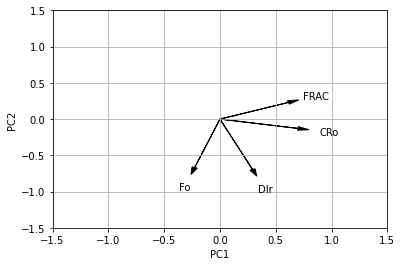

In [ ]:
for i in range(Num):
  #plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'k',alpha = 1.0)
  plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'k',head_width=0.05,
            head_length=0.1, fc='k', ec='k')
  plt.text(coeff[i,0]* 1.4, coeff[i,1] * 1.4, Name[i], color = 'k', ha = 'center', va = 'center')

plt.ylim(-1.5, 1.5)     # set the ylim to bottom, top
plt.xlim(-1.5, 1.5)     # set the ylim to bottom, top
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

plt.show()

In [ ]:
print(coeff)

[[ 0.29139655 -0.69526269]
 [ 0.61307997  0.22964391]
 [-0.22683889 -0.6688067 ]
 [ 0.69840183 -0.12872861]]


In [ ]:
n_samples = X.shape[0]

pca = PCA()
X_transformed = pca.fit_transform(X)

# We center the data and compute the sample covariance matrix.
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

1.0214888659922585
1.0216932046331868
1.0130711773368979
1.0132738321033192
0.9876878059449903
0.9878853830215938
0.9777521507258494
0.9779477402739044


In [ ]:
print(coeff)
print(Name)

[[ 0.29139655 -0.69526269]
 [ 0.61307997  0.22964391]
 [-0.22683889 -0.6688067 ]
 [ 0.69840183 -0.12872861]]
['DIr', 'FRAC', 'Fo', 'CRo']


In [ ]:
'''
[[ 0.42355377  0.68684867]
 [-0.77495516  0.03123291]
 [-0.33564534  0.09131014]
 [-0.32770246  0.7203651 ]]

 [[-0.50239555 -0.32573271]
 [-0.39154572  0.6968612 ]
 [-0.59896066  0.28218831]
 [ 0.48532133  0.57328215]]

 
['DIr', 'FRAC', 'Fo', 'CRo']
'''

"\n[[ 0.42355377  0.68684867]\n [-0.77495516  0.03123291]\n [-0.33564534  0.09131014]\n [-0.32770246  0.7203651 ]]\n\n [[-0.50239555 -0.32573271]\n [-0.39154572  0.6968612 ]\n [-0.59896066  0.28218831]\n [ 0.48532133  0.57328215]]\n\n \n['DIr', 'FRAC', 'Fo', 'CRo']\n"

In [ ]:
!pip install pca

In [ ]:
from pca import pca

In [ ]:
X=Parallel_Coord[['DIr','FRAC Its','Fo','CRo']]
y=Parallel_Coord[['F']]

[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Processing dataframe..
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..


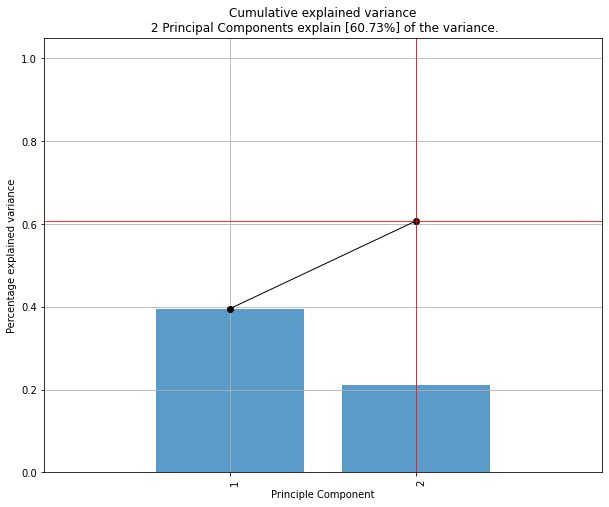

<Figure size 432x288 with 0 Axes>

In [ ]:
# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(X)

# Plot explained variance
fig, ax = model.plot()

In [ ]:
# Scatter first 2 PCs
# fig, ax = model.scatter()



In [ ]:
# Make biplot with the number of features
# fig, ax = model.biplot(n_feat=4)

In [ ]:
#model = pca(n_components=3)
#results = model.fit_transform(X)
#fig, ax= model.scatter3d()


In [ ]:
#fig, ax = model.biplot3d(n_feat=4)

In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>